In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'gender_submission.csv', 'test.csv']


In [11]:
dfTrain = pd.read_csv('../input/train.csv')

## Name

In [12]:
dfTrain['Title'] = dfTrain['Name'].map(lambda x: re.compile(",(.*?)\.").findall(x)[0])
dfTrain['Title'] = dfTrain['Title'].map(str.strip) 
dfTrain['Title'][dfTrain.Title=='Jonkheer'] = 'Master'
dfTrain['Title'][dfTrain.Title.isin(['Ms','Mlle'])] = 'Miss'
dfTrain['Title'][dfTrain.Title.isin(['Mme','Dona', 'Lady', 'the Countess'])] = 'Mrs'
dfTrain['Title'][dfTrain.Title.isin(['Capt', 'Don', 'Major', 'Col', 'Sir'])] = 'Mr'
dfTrain['Title'][dfTrain.Title.isin(['Dr','Rev'])] = 'DrAndRev'
dfTrain['Title'] = pd.factorize(dfTrain.Title)[0]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages

## Sex

In [13]:
dfTrain['Sex'] = pd.factorize(dfTrain.Sex)[0]

## SibSp, Parch

In [14]:
dfTrain['FamilySize'] = dfTrain['SibSp'] + dfTrain["Parch"]
dfTrain['FamilySize'][dfTrain.FamilySize==0] = 0
dfTrain['FamilySize'][dfTrain.FamilySize>0] = 1 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Age

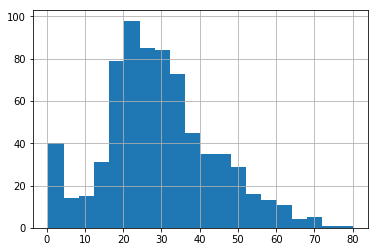

In [15]:
dfTrain['Age'].hist(bins=20)

In [16]:
dfTrain['Age'][(dfTrain.Age<18)&(dfTrain.Age.notnull())] = 0
dfTrain['Age'][(dfTrain.Age>=18)&(dfTrain.Age.notnull())] = 1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Fare

In [17]:
dfTrain['Fare'][dfTrain.Fare<20] = 0
dfTrain['Fare'][dfTrain.Fare>=20] = 1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Have a look after data transformation

In [18]:
dfTrain.drop(['PassengerId', 'Name', 'SibSp' ,'Parch','Ticket', 'Cabin','Embarked'],inplace=True, axis=1)
dfTrain.head()
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           714 non-null float64
Fare          891 non-null float64
Title         891 non-null int64
FamilySize    891 non-null int64
dtypes: float64(2), int64(5)
memory usage: 48.8 KB
